**Business Understanding**
*   **Tujuan:** Membantu perusahaan pelayaran atau pihak terkait memahami
                faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.
*  ** Manfaat:**
      *   Memberikan insight untuk perbaikan sistem keselamatan di masa depan.
      *   Dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi.
*   **Output Model:** Prediksi (0 = Tidak Selamat, 1 = Selamat) untuk setiap penumpang berdasarkan fitur input.

Selanjutnya, kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

# Import Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Load Dataset

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Uynkkg0X1yJGzFxYWCxAWYPPB1p0p8uZ')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


https://drive.google.com/file/d/1Uynkkg0X1yJGzFxYWCxAWYPPB1p0p8uZ/view?usp=drive_link

# Pemeriksaan Missing Values (Data Kosong)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Cleaning

Menghapus Kolom yang Tidak Digunakan

In [ ]:
# drop kolom
df = df.drop(columns=['Cabin','Name', 'Ticket'], axis=1)

Visualisasi Distribusi dan Outlier pada Kolom Age

<Axes: >

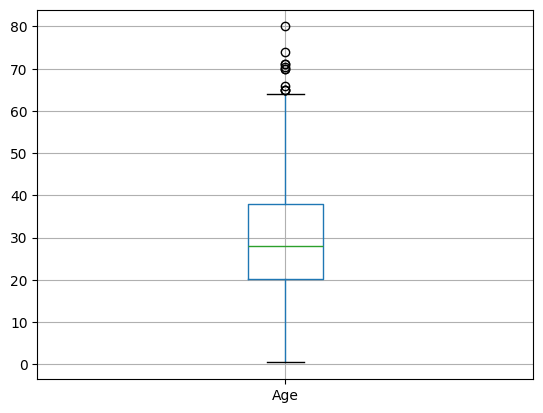

In [ ]:
df.boxplot(column=['Age'])

Mengisi Nilai Kosong pada Kolom Age dengan Median

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Mengisi Nilai Kosong pada Kolom Embarked dengan Modus

In [ ]:
# replacing the missing value in "Embarked" column with mode value
df['Embarked' ].fillna(df['Embarked'].mode() [0], inplace= True)

/tmp/ipython-input-4014510984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked' ].fillna(df['Embarked'].mode() [0], inplace= True)


Verifikasi Ulang Missing Values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Encoding Data Kategorikal

In [ ]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q':2}
}
df.replace(replacements, inplace=True)

/tmp/ipython-input-1191161733.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


# Split Data dan Transformasi (Scaling)

**Split Data Variabel X dan Y**

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

**Transform Data**

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Modelling – Menentukan Struktur Input untuk Neural Network

In [ ]:
X_train.shape

(712, 8)

In [ ]:
X_train.shape[1]

8

# Pembuatan Model Neural Network (Arsitektur ANN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))

# Dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid' ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Kompilasi Model dan Ringkasan Arsitektur (Model Summary)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping (Pencegahan Overfitting Selama Training)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training Model Neural Network

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5926 - loss: 0.6837 - val_accuracy: 0.6643 - val_loss: 0.6520
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6623 - loss: 0.6577 - val_accuracy: 0.6993 - val_loss: 0.6331
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6742 - loss: 0.6260 - val_accuracy: 0.7273 - val_loss: 0.6187
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 0.6291 - val_accuracy: 0.7273 - val_loss: 0.5996
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.5777 - val_accuracy: 0.7413 - val_loss: 0.5793
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.5552 - val_accuracy: 0.7483 - val_loss: 0.5609
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7489 - loss: 0.5705 - val_accuracy: 0.7552 - val_loss: 0.5467
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.5345 - val_accuracy: 0.7622 - v

# Evaluasi Model (Testing Data)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss      :", loss)
print("Test Accuracy  :", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8359 - loss: 0.3898 
Test Loss      : 0.40233710408210754
Test Accuracy  : 0.8156424760818481


# Visualisasi Hasil Pelatihan (Accuracy dan Loss)

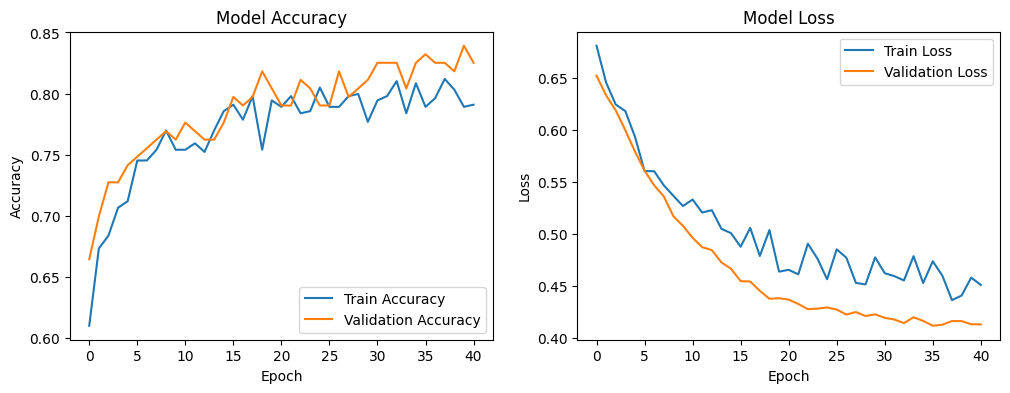

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy' )
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' )
plt.title('Model Accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot (1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.title('Model Loss' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()